In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
import numpy as np

plt.rcParams['animation.ffmpeg_path'] = 'C:\\Program Files\\ImageMagick-7.0.7-Q16\\ffmpeg.exe'
plt.rcParams["animation.convert_path"] = "C:\\Program Files\\ImageMagick-7.0.7-Q16\\magick.exe"

% matplotlib inline

In [ ]:
i = 499

Tf = np.genfromtxt('out/output_' + str(i) + '.csv')
Tf = Tf.transpose()

X = np.arange(Tf.shape[1])
Y = np.arange(Tf.shape[0])

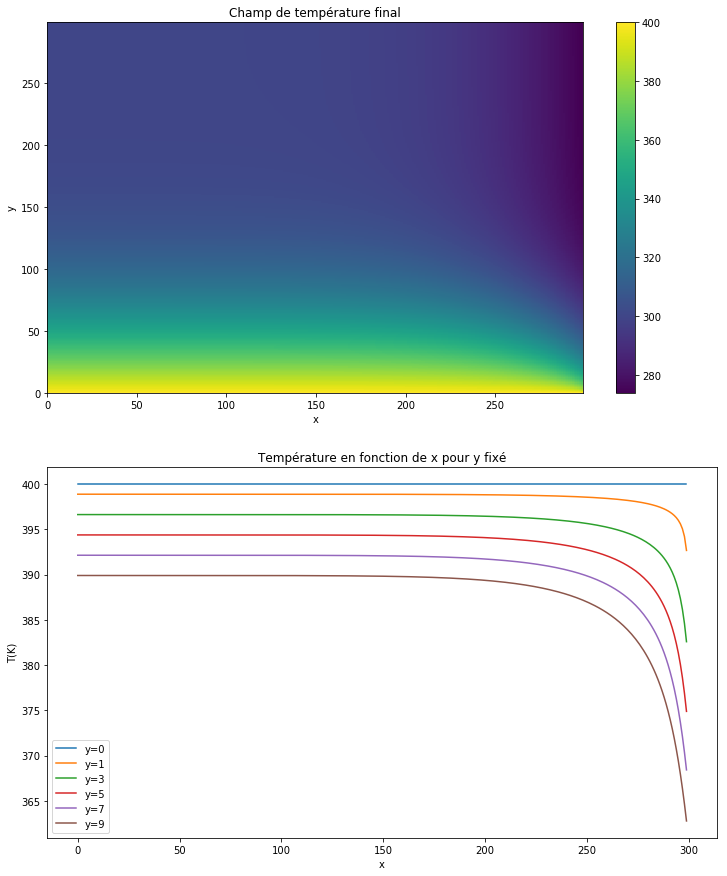

In [3]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,15))

im = ax1.pcolormesh(X,Y,Tf, label='Temperature en Kelvin')
ax1.set_title("Champ de température final")
fig.colorbar(im, ax=ax1)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

yfix = [0,1,3,5,7,9]
for y in yfix:
    ax2.plot(X,Tf[y,:], label='y={}'.format(y))
ax2.set_title("Température en fonction de x pour y fixé")
ax2.set_xlabel("x")
ax2.set_ylabel("T(K)")
ax2.legend()

In [5]:
imax = 500
T = []
for i in range(0,imax,5):
    T.append(np.genfromtxt('out/output_' + str(i+1) + '.csv'))

for i in range(len(T)):
    T[i] = T[i].transpose()

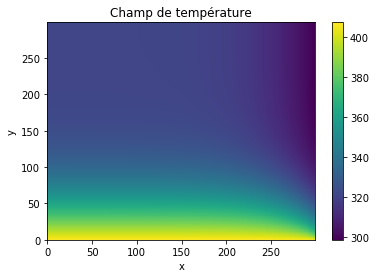

In [7]:
fig, ax = plt.subplots()
xdata, ydata, Tdata = [], [], []

im = ax.pcolormesh(X,Y,T[0], label='Temperature en Kelvin')

fig.colorbar(im, ax=ax)

def init():
    ax.set_title("Champ de température")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    return im,

def update(frame):
#     xdata = X
#     ydata = Y
#     Tdata = T[frame]
    im = ax.pcolormesh(X,Y,T[frame], label='Temperature en Kelvin')
    return im,

ani = FuncAnimation(fig, update, frames=range(1,len(T)), init_func=init, blit=False)
ani.save("500s_Fx5-04_Fy5-04_T0300_Ta250_T1400_h1000.gif", writer="imagemagick")